# jktebop: requiv_max_limit

Here we'll examine how well [jktebop](../api/phoebe.parameters.compute.jktebop.md) agrees with PHOEBE with increased distortion.


Setup
-------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

In [2]:
import phoebe

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101))

<ParameterSet: 78 parameters | contexts: figure, dataset, constraint, compute>

In order to allow jktebop to compute models, we'll set `requiv_max_limit=1.0`, effectively disabling the error that would otherwise be raised at a default factor of 0.5 by [b.run_checks_compute](../api/phoebe.frontend.bundle.Bundle.run_checks_compute.md).

In [4]:
b.add_compute('jktebop', requiv_max_limit=1.0)

<ParameterSet: 23 parameters | datasets: _default, lc01>

And to avoid any issues with falling outside the atmosphere grids, we'll set a simple flat limb-darkening model and disable irradiation.

In [5]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'linear')
b.set_value_all('ld_coeffs', [0.5])
b.set_value_all('irrad_method', 'none')

For PHOEBE, we'll use blackbody atmospheres (again to avoid any issues of falling out of the grid).  For jktebop, we'll keep 'ck2004' - this will only be used to compute the flux-scaling factor based on mean stellar values, so should not fall outside the grid.

At a quick glance, we can see the jktebop agrees quite well at a factor of 0.6, but noticeable differences appear by 0.7 (keep in mind, the default value before an error will be raise within PHOEBE is 0.5, but this can be adjusted as necessary, with caution).

100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


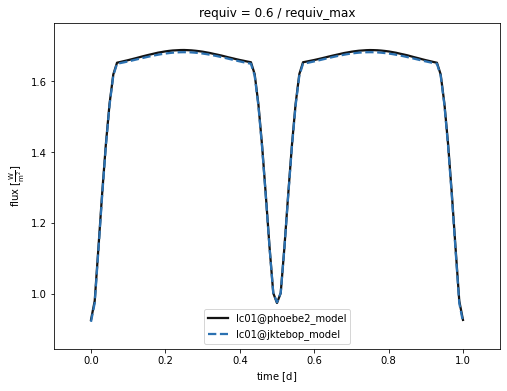

100%|██████████| 1/1 [00:00<00:00, 12.64it/s]


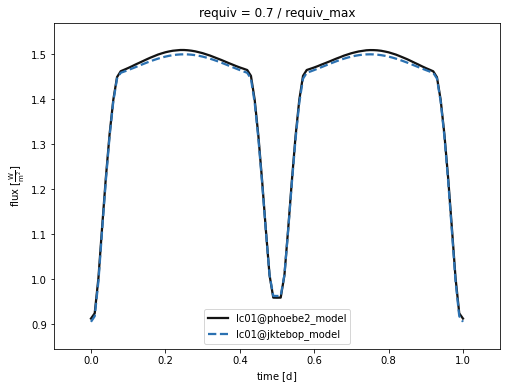

100%|██████████| 1/1 [00:00<00:00, 12.57it/s]


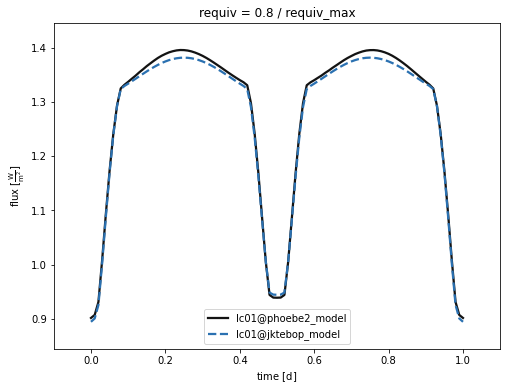

100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


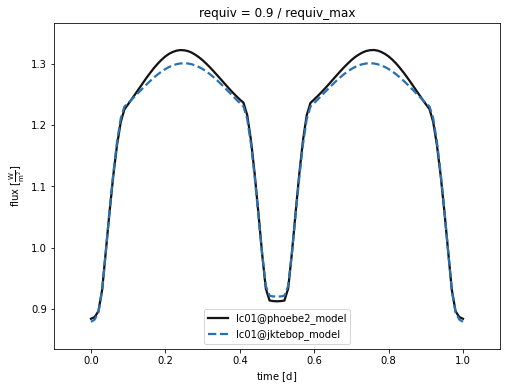

100%|██████████| 1/1 [00:00<00:00, 11.95it/s]


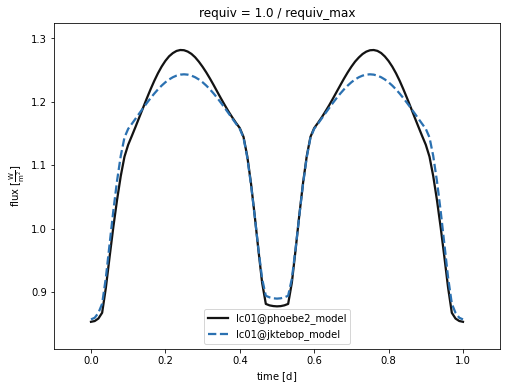

In [6]:
requiv_max = b.get_value('requiv_max', component='primary', context='component')
for requiv_max_factor in [0.6, 0.7, 0.8, 0.9, 1.0]:
    b.set_value('requiv', component='primary', value=requiv_max_factor*requiv_max)
    
    b.run_compute(kind='phoebe', atm='blackbody', model='phoebe2_model', overwrite=True)
    b.run_compute(kind='jktebop', model='jktebop_model', overwrite=True)
    
    _ = b.plot(context='model', 
               title='requiv = {:0.1f} / requiv_max'.format(requiv_max_factor), 
               draw_title=True, 
               legend=True, show=True)